In [1]:
import sys
import importlib

import numpy as np
import pandas as pd
import os.path

# Import the model we are using
import seaborn as sns
import matplotlib.pyplot as plt



In [8]:
# run this command only the first time to download the BTSSlayers library from gitbub
!wget -O BTSSlayers.py https://raw.githubusercontent.com/Critt-Kent/Behavioral-Translation-Style-Space/refs/heads/main/BTSSlayers.py
!wget -O sorted.gaze.clean.txt https://raw.githubusercontent.com/Critt-Kent/Behavioral-Translation-Style-Space/refs/heads/main/sorted.gaze.clean.txt


--2025-09-10 19:54:34--  https://raw.githubusercontent.com/Critt-Kent/Behavioral-Translation-Style-Space/refs/heads/main/BTSSlayers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59077 (58K) [text/plain]
Saving to: ‘BTSSlayers.py’

BTSSlayers.py       100%[===================>]  57.69K  --.-KB/s    in 0.01s   

2025-09-10 19:54:34 (5.42 MB/s) - ‘BTSSlayers.py’ saved [59077/59077]



In [90]:
import BTSSlayers as btss

In [91]:
# set dataframe vizualisation options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Key-Gaze analysis
- Read AU and FD data
- Compute Gaze measures
- Correlate with PUB and KBI 

In [120]:
# Read a large set of 491 translation sessions from the TPR-DB
GD = pd.read_csv('sorted.gaze.clean.txt', sep="\t", dtype=None)

# read the Tables from the TPR-DB
BTSS1 = btss.readBTSSsessions(GD['Study-Session'], layers = ['au1', 'fd'], verbose=0)

# rename for easier use
AUdf = BTSS1['au1']
FDdf = BTSS1['fd'] 
print("AUs:", AUdf.shape, "FDs:", FDdf.shape)

AUs: (263719, 73) FDs: (999492, 22)


In [39]:
# extract one row per session 
AUdf['StudySession'] = AUdf['Study'] + '-' + AUdf['Session']
AUdf = AUdf.drop_duplicates(subset=['StudySession'])
AUdf.shape

(490, 73)

In [121]:
FDdf['StudySession'] = FDdf['Study'] + '-' + FDdf['Session']
#FDdf = FDdf.drop_duplicates(subset = ['StudySession'])
FDdf.shape

(999492, 23)

In [81]:
AUdf.head()

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Phase,Type,Dur,SGid,SGnbr,TGid,TGnbr,Ins,Del,PosS,PosT,Scatter,CrossS,CrossT,Gram5,GazePath,FixS,TrtS,FixT,TrtT,KBI,PUB,Edit,ProbSgaze,ProbTgaze,ProbCgaze,ProbSTCgaze,HSgaze,HTgaze,HCgaze,HSTCgaze,StudySession,End,Dur_L,Dur_R,Dur_S,Dur_N,STs_TTs,NextTime,Total_Dur,One,MaxDur,RelDur_L,RelDur_R,RelDur_S,RelDur_N,GPlabel,KBtype,PUnbr,PUdur,KBnbr,KBdur,HOF,WperFix,HOFnbr,Tstyles,LogDur,LogDur_L,LogDur_R,LogDur_S,LogIns,LogDel,LogKBI,LogPUB
0,1,ACS08,P03_T1,en,da,T,1,P03,3676,O,1,73487,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:16+S:16+S:14+S:17+S:17+S:19+S:20+S:19+S:21+S...,334,65695,1,0,336,738,---,0.7080,0.4756,0.5423,0.3527,0.6026,1.3953,1.0144,1.6631,ACS08-P03_T1,77163,55485,8053,9929,20,116,77163.0,73487,1,73487,0.755032,0.109584,0.135112,0.000272,L,P,1,80578,1,80578,O,0.345238,1,0,11.204877,10.923886,8.993924,9.203316,0.0,0.0,5.820083,6.605298
1053,1,ACS08,P08_T1,en,da,T,1,P08,2384,O,2,34,---,0,---,0,0,0,---,---,0.0,0.0,0.0,20000,T:1,0,0,1,34,324,570,---,1.0000,1.0000,0.8333,0.8333,0.0000,0.0000,0.6500,0.6500,ACS08-P08_T1,2418,0,0,34,0,1,2418.0,34,1,34,0.000000,0.000000,1.000000,0.000000,S,0,1,6776,1,34,F,0.500000,1,0,3.555348,0.000000,0.000000,3.555348,0.0,0.0,5.783825,6.347389
1659,1,ACS08,P10_T1,en,da,T,1,P10,1388,O,1,2572,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:4+S:4+S:4+S:3+S:4+S:6+S:6+S:8+S:9+S:10+S:11+...,13,2332,0,0,290,669,---,0.7179,0.3333,0.4615,0.3205,0.7199,1.8223,1.2345,2.0262,ACS08-P10_T1,3960,1635,0,937,0,9,3960.0,2572,1,2572,0.635692,0.000000,0.364308,0.000000,LS,P,1,3547,1,3547,O,0.642857,1,0,7.852828,7.400010,0.000000,6.843750,0.0,0.0,5.673323,6.507278
2268,1,ACS08,P07_T3,en,da,T,3,P07,1228,O,2,658,---,0,---,0,0,0,---,---,0.0,0.0,0.0,20000,T:153+T:153+T:153+S:159,1,0,3,598,294,732,---,0.8167,0.0833,0.2667,0.0833,0.5159,1.7880,0.9897,1.9830,ACS08-P07_T3,1886,0,579,59,20,1,1886.0,658,1,658,0.000000,0.879939,0.089666,0.030395,R,P,1,7472,1,7472,O,0.200000,1,0,6.490724,0.000000,6.363028,4.094345,0.0,0.0,5.686975,6.597146
2675,1,ACS08,P14_T3,en,da,T,3,P14,166,O,1,24861,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:30+S:26+S:26+S:28+S:30+S:30+S:33+S:33+S:35+S...,107,22668,0,0,348,1302,---,0.4523,0.2791,0.3925,0.2555,0.8235,1.6250,1.0093,1.7631,ACS08-P14_T3,25027,20077,2052,2732,0,43,25027.0,24861,1,24861,0.807570,0.082539,0.109891,0.000000,L,P,1,63334,1,63334,O,0.398148,1,0,10.121096,9.907380,7.627057,7.913155,0.0,0.0,5.855072,7.172425


In [94]:
FDdf.head()

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Dur,Win,Seg,STid,SGid,TTid,TGid,Cur,X,Y,Paral,Edit,EDid,StudySession
0,1,ACS08,P03_T1,en,da,T,1,P03,3676,99,1,2,16,16,13,13,90,1022,75,0,---,---,ACS08-P03_T1
1,2,ACS08,P03_T1,en,da,T,1,P03,3795,120,1,2,16,16,13,13,90,1026,83,0,---,---,ACS08-P03_T1
2,3,ACS08,P03_T1,en,da,T,1,P03,3935,199,1,2,14,14,11,11,85,996,96,0,---,---,ACS08-P03_T1
3,4,ACS08,P03_T1,en,da,T,1,P03,4154,199,1,2,17,17,14,14,98,1122,87,0,---,---,ACS08-P03_T1
4,5,ACS08,P03_T1,en,da,T,1,P03,4373,140,1,2,17,17,14,14,101,1097,93,0,---,---,ACS08-P03_T1


## Log duration of Fixations

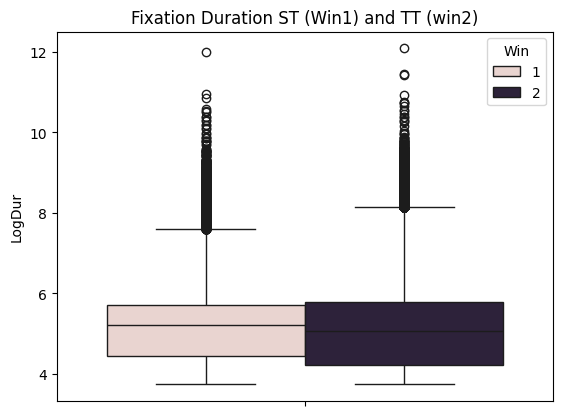

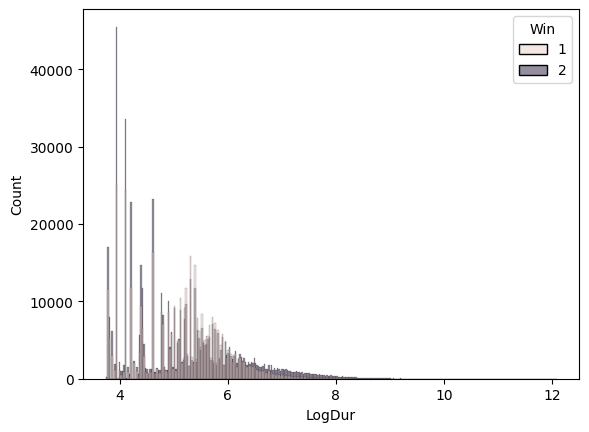

In [123]:
# Log duration of fixation
FDdf['LogDur'] = np.log1p(FDdf.Dur)

sns.boxplot(data=FDdf, y="LogDur", hue='Win').set(title='Fixation Duration ST (Win1) and TT (win2)')
plt.show()

sns.histplot(data=FDdf, x="LogDur", hue='Win')
plt.show()



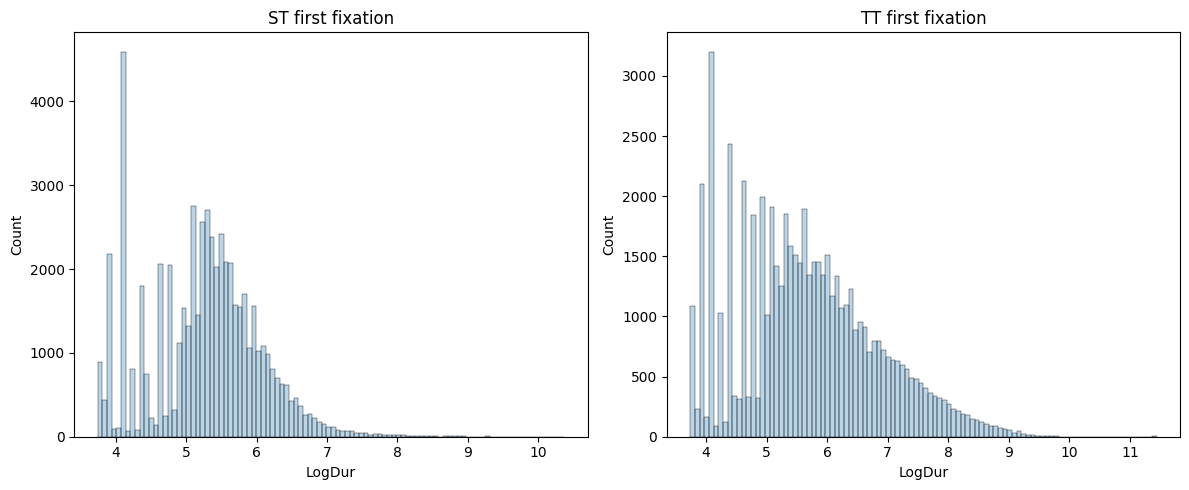

In [140]:
# Log duration of first fixation on ST and TT words
FDdf['StudySessionWinFirst'] = FDdf['StudySession'] + '-' + FDdf['Win'].astype(str)  + '.' + FDdf['SGid'].astype(str) 

FDst = FDdf[FDdf.Win == 1].copy()
FDtt = FDdf[FDdf.Win == 2].copy()

FDst['StudySessionFirst'] = FDst['StudySession'] + FDst['SGid'].astype(str)
FDtt['StudySessionFirst'] = FDtt['StudySession'] + FDtt['TGid'].astype(str)

FDst_first = FDst.drop_duplicates(subset=['StudySessionFirst'], keep='first')
FDtt_first = FDtt.drop_duplicates(subset=['StudySessionFirst'], keep='first')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=FDst_first, x='LogDur', alpha=0.3, bins=100, ax=ax1)
ax1.set_title('ST first fixation')

sns.histplot(data=FDtt_first, x='LogDur', alpha=0.3, bins=100, ax=ax2)
ax2.set_title('TT first fixation')

fig.tight_layout()
plt.show()

-  Distribution is right-skewed on ST with a much longer tail extending to the right than to the left.
-  very few data points for the TT.

##  All sessions - Finding Thresholds for Automatic and Conscious processing

### Mean and Standard deviation

In [110]:
# Calculating mean and standard deviation for ST and TT Data 
mean_st = FDst_first['LogDur'].mean()
std_st = FDst_first['LogDur'].std()

mean_tt = FDtt_first['LogDur'].mean()
std_tt = FDtt_first['LogDur'].std()

print(f"ST Data: Mean = {mean_st:.2f}, Std Dev = {std_st:.2f}")
print(f"TT Data: Mean = {mean_tt:.2f}, Std Dev = {std_tt:.2f}")

ST Data: Mean = 5.25, Std Dev = 0.79
TT Data: Mean = 5.66, Std Dev = 1.16


- set thresholds based on standard deviations to distinguish between "automatic" and "conscious" processing

In [126]:
# Calculate the upper and lower threshold for ST data

# threshold_st_upper = mean_st + (2 * std_st)
# print(f"ST 'Conscious' Threshold (Mean + 2*SD): {threshold_st_upper:.2f}")

# threshold_st_lower = mean_st - (2 * std_st)
# print(f"ST 'Automatic' Threshold (Mean - 2*SD): {threshold_st_lower:.2f}")

# threshold_tt_upper = mean_tt + (2 * std_tt)
# print(f"TT 'Conscious' Threshold (Mean + 2*TD): {threshold_tt_upper:.2f}")

# threshold_tt_lower = mean_tt - (2 * std_tt)
# print(f"TT 'Automatic' Threshold (Mean - 2*TD): {threshold_tt_lower:.2f}")

threshold_st_upper = mean_st + std_st
print(f"ST 'Conscious' Threshold (Mean + SD): {threshold_st_upper:.2f}")

threshold_st_lower = mean_st - std_st
print(f"ST 'Automatic' Threshold (Mean - SD): {threshold_st_lower:.2f}")

threshold_tt_upper = mean_tt + std_tt
print(f"TT 'Conscious' Threshold (Mean + TD): {threshold_tt_upper:.2f}")

threshold_tt_lower = mean_tt - std_tt
print(f"TT 'Automatic' Threshold (Mean - TD): {threshold_tt_lower:.2f}")

ST 'Conscious' Threshold (Mean + SD): 6.05
ST 'Automatic' Threshold (Mean - SD): 4.46
TT 'Conscious' Threshold (Mean + TD): 6.82
TT 'Automatic' Threshold (Mean - TD): 4.51


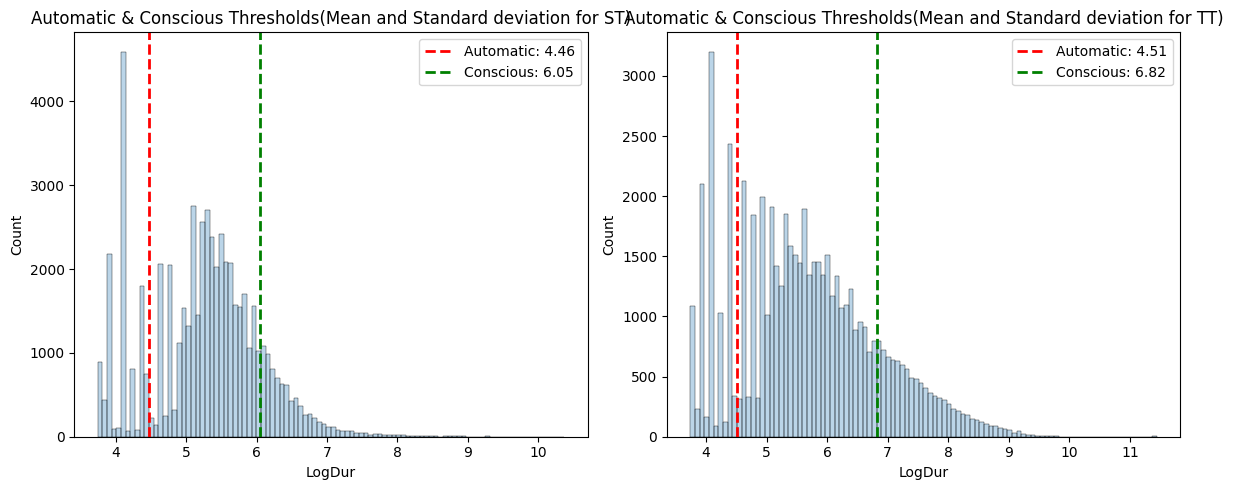

In [133]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=FDst_first, x='LogDur', alpha=0.3, bins=100, ax=ax1)
ax1.axvline(threshold_st_lower, color='red', linestyle='--', linewidth=2, label=f'Automatic: {threshold_st_lower:.2f}')
ax1.axvline(threshold_st_upper, color='green', linestyle='--', linewidth=2, label=f'Conscious: {threshold_st_upper:.2f}')
ax1.set_title('Automatic & Conscious Thresholds(Mean and Standard deviation for ST)')
ax1.legend()

sns.histplot(data=FDtt_first, x='LogDur', alpha=0.3, bins=100, ax=ax2)
ax2.axvline(threshold_tt_lower, color='red', linestyle='--', linewidth=2, label=f'Automatic: {threshold_tt_lower:.2f}')
ax2.axvline(threshold_tt_upper, color='green', linestyle='--', linewidth=2, label=f'Conscious: {threshold_tt_upper:.2f}')
ax2.set_title('Automatic & Conscious Thresholds(Mean and Standard deviation for TT)')
ax2.legend()

fig.tight_layout()
plt.show()

### Quantiles
- define a threshold as the value below which a certain percentage of your data falls.

In [142]:

# Use 10th percentile for the lower and 90th for the upper.
lower_quantile = 0.25
upper_quantile = 0.75

# Calculate the two threshold values
lower_threshold_st = FDst_first['LogDur'].quantile(lower_quantile)
upper_threshold_st = FDst_first['LogDur'].quantile(upper_quantile)

lower_threshold_tt = FDtt_first['LogDur'].quantile(lower_quantile)
upper_threshold_tt = FDtt_first['LogDur'].quantile(upper_quantile)

print(f"Automatic Threshold - ST(Lower Bound): {lower_threshold:.2f}")
print(f"Conscious Threshold - ST(Upper Bound): {upper_threshold:.2f}")
print(f"Automatic Threshold - TT(Lower Bound): {lower_threshold:.2f}")
print(f"Conscious Threshold - TT(Upper Bound): {upper_threshold:.2f}")

FDst_first = FDst_first.copy()
FDtt_first = FDtt_first.copy()

# Define the conditions and corresponding choices for classification
conditions = [
    FDst_first['LogDur'] < lower_threshold_st, 
    FDst_first['LogDur'] > upper_threshold_st
]
choices = [
    'Automatic_st',                             
    'Conscious_st'                              
]

# The 'default' argument is used for any row that doesn't meet any of the conditions.
FDst_first['ProcessType'] = np.select(conditions, choices, default='Intermediate_st')

# Check the results to see how data was categorized
print("\nValue counts for the ST classification:")
print(FDst_first['ProcessType'].value_counts())


conditions = [
    FDtt_first['LogDur'] < lower_threshold_tt, 
    FDtt_first['LogDur'] > upper_threshold_tt  
]
choices = [
    'Automatic_tt',                             
    'Conscious_tt'                              
]

# The 'default' argument is used for any row that doesn't meet any of the conditions.
FDtt_first['ProcessType'] = np.select(conditions, choices, default='Intermediate_tt')

# Check the results to see how data was categorized
print("\nValue counts for the TT classification:")
print(FDtt_first['ProcessType'].value_counts())


Automatic Threshold - ST(Lower Bound): 4.11
Conscious Threshold - ST(Upper Bound): 6.22
Automatic Threshold - TT(Lower Bound): 4.11
Conscious Threshold - TT(Upper Bound): 6.22

Value counts for the ST classification:
ProcessType
Intermediate_st    29015
Automatic_st       14452
Conscious_st       14376
Name: count, dtype: int64

Value counts for the TT classification:
ProcessType
Intermediate_tt    29650
Conscious_tt       14688
Automatic_tt       14437
Name: count, dtype: int64


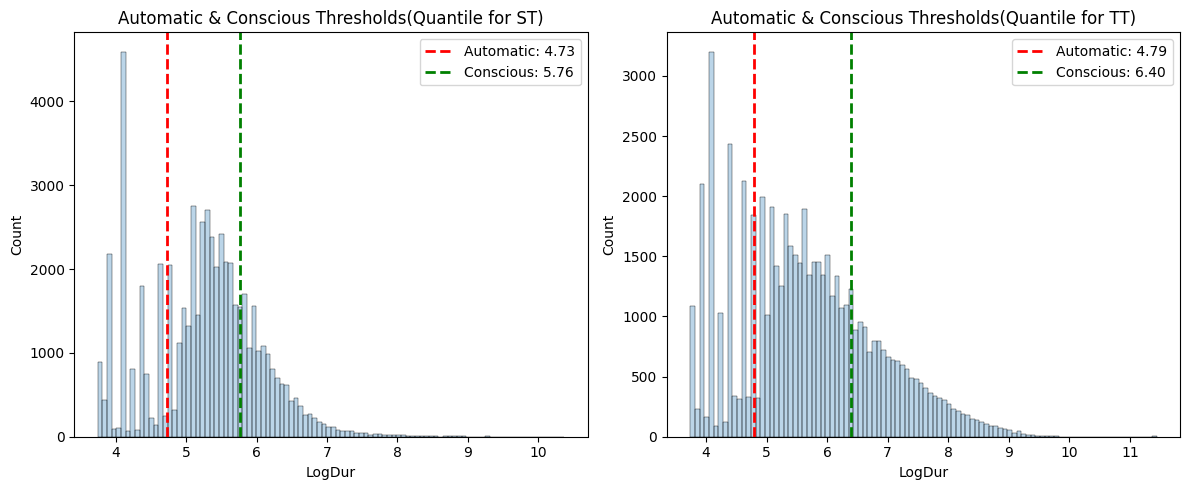

In [145]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=FDst_first, x='LogDur', alpha=0.3, bins=100, ax=ax1)
ax1.axvline(lower_threshold_st, color='red', linestyle='--', linewidth=2, label=f'Automatic: {lower_threshold_st:.2f}')
ax1.axvline(upper_threshold_st, color='green', linestyle='--', linewidth=2, label=f'Conscious: {upper_threshold_st:.2f}')
ax1.set_title('Automatic & Conscious Thresholds(Quantile for ST)')
ax1.legend()

sns.histplot(data=FDtt_first, x='LogDur', alpha=0.3, bins=100, ax=ax2)
ax2.axvline(lower_threshold_tt, color='red', linestyle='--', linewidth=2, label=f'Automatic: {lower_threshold_tt:.2f}')
ax2.axvline(upper_threshold_tt, color='green', linestyle='--', linewidth=2, label=f'Conscious: {upper_threshold_tt:.2f}')
ax2.set_title('Automatic & Conscious Thresholds(Quantile for TT)')
ax2.legend()

fig.tight_layout()
plt.show()

### Gaussian Mixture Model (GMM)
- assumes that data is not one single distribution, but a mixture of two or more distributions

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.optimize import fsolve

# Reshape your data for scikit-learn
ST = FDst_first['LogDur'].values.reshape(-1, 1)
TT = FDtt_first['LogDur'].values.reshape(-1, 1)

# Instantiate and fit the GMM with 3 components
gmm_st = GaussianMixture(n_components=3, random_state=42)
gmm_st.fit(ST)

gmm_tt = GaussianMixture(n_components=3, random_state=42)
gmm_tt.fit(TT)

print("GMM has been successfully fitted.")


GMM has been successfully fitted.


In [152]:
"""GMM doesn't order its components. We need to get the means, standard deviations, and weights, and 
then sort them from "fastest" to "slowest" to label them correctly."""

# Extract the parameters of the three fitted Gaussians
means_st = gmm_st.means_.flatten()
covariances_st = gmm_st.covariances_.flatten()
weights_st = gmm_st.weights_.flatten()

# Calculate standard deviations from covariances
stds_st = np.sqrt(covariances_st)

# Sort the components by their means (from low to high)
sort_indices_st = np.argsort(means_st)
means_st = means_st[sort_indices_st]
stds_st = stds_st[sort_indices_st]
weights_st = weights_st[sort_indices_st]

auto_params_st = {'mean_st': means_st[0], 'std_st': stds_st[0], 'weight_st': weights_st[0]}
inter_params_st = {'mean_st': means_st[1], 'std_st': stds_st[1], 'weight_st': weights_st[1]}
cons_params_st = {'mean_st': means_st[2], 'std_st': stds_st[2], 'weight_st': weights_st[2]}

print("Components for ST window")
print(f"Automatic Component: Mean={auto_params_st['mean_st']:.2f}, Std={auto_params_st['std_st']:.2f}")
print(f"Intermediate Component: Mean={inter_params_st['mean_st']:.2f}, Std={inter_params_st['std_st']:.2f}")
print(f"Conscious Component: Mean={cons_params_st['mean_st']:.2f}, Std={cons_params_st['std_st']:.2f}")


Components for ST window
Automatic Component: Mean=4.10, Std=0.20
Intermediate Component: Mean=5.34, Std=0.45
Conscious Component: Mean=5.94, Std=0.75


In [153]:
"""GMM doesn't order its components. We need to get the means, standard deviations, and weights, and 
then sort them from "fastest" to "slowest" to label them correctly."""

# Extract the parameters of the three fitted Gaussians
means_tt = gmm_tt.means_.flatten()
covariances_tt = gmm_tt.covariances_.flatten()
weights_tt = gmm_tt.weights_.flatten()

# Calculate standard deviations from covariances
stds_tt = np.sqrt(covariances_tt)

# Sort the components by their means (from low to high)
sort_indices_tt = np.argsort(means_tt)
means_tt = means_tt[sort_indices_tt]
stds_tt = stds_tt[sort_indices_tt]
weights_tt = weights_tt[sort_indices_tt]

auto_params_tt = {'mean_tt': means_tt[0], 'std_tt': stds_tt[0], 'weight_tt': weights_tt[0]}
inter_params_tt = {'mean_tt': means_tt[1], 'std_tt': stds_tt[1], 'weight_tt': weights_tt[1]}
cons_params_tt = {'mean_tt': means_tt[2], 'std_tt': stds_tt[2], 'weight_tt': weights_tt[2]}

print("Components for TT window")
print(f"Automatic Component: Mean={auto_params_tt['mean_tt']:.2f}, Std={auto_params_tt['std_tt']:.2f}")
print(f"Intermediate Component: Mean={inter_params_tt['mean_tt']:.2f}, Std={inter_params_tt['std_tt']:.2f}")
print(f"Conscious Component: Mean={cons_params_tt['mean_tt']:.2f}, Std={cons_params_tt['std_tt']:.2f}")


Components for TT window
Automatic Component: Mean=4.39, Std=0.41
Intermediate Component: Mean=5.67, Std=0.54
Conscious Component: Mean=7.16, Std=0.79


In [157]:
# Define a function that finds the intersection of two Gaussian PDFs
"""threshold between two distributions is the point x where their probability density functions (PDFs) are equal"""

def find_intersection(mean1, std1, mean2, std2):
    func = lambda x: norm.pdf(x, mean1, std1) - norm.pdf(x, mean2, std2)
    initial_guess = (mean1 + mean2) / 2
    return fsolve(func, initial_guess)[0]

# Calculate the two thresholds for ST
threshold_auto_inter_st = find_intersection(auto_params_st['mean_st'], auto_params_st['std_st'], 
                                          inter_params_st['mean_st'], inter_params_st['std_st'])

threshold_inter_cons_st = find_intersection(inter_params_st['mean_st'], inter_params_st['std_st'], 
                                          cons_params_st['mean_st'], cons_params_st['std_st'])

# Calculate the two thresholds for TT
threshold_auto_inter_tt = find_intersection(auto_params_tt['mean_tt'], auto_params_tt['std_tt'], 
                                          inter_params_tt['mean_tt'], inter_params_tt['std_tt'])

threshold_inter_cons_tt = find_intersection(inter_params_tt['mean_tt'], inter_params_tt['std_tt'], 
                                          cons_params_tt['mean_tt'], cons_params_tt['std_tt'])

print(f"\nCalculated Thresholds for ST:")
print(f"Threshold 1 (anything below is 'Automatic'): {threshold_auto_inter_st:.2f}")
print(f"Threshold 2 (anything above is 'Conscious'): {threshold_inter_cons_st:.2f}")

print(f"\nCalculated Thresholds for TT:")
print(f"Threshold 1 (anything below is 'Automatic'): {threshold_auto_inter_tt:.2f}")
print(f"Threshold 2 (anything above is 'Conscious'): {threshold_inter_cons_tt:.2f}")


Calculated Thresholds for ST:
Threshold 1 (anything below is 'Automatic'): 4.54
Threshold 2 (anything above is 'Conscious'): 5.81

Calculated Thresholds for TT:
Threshold 1 (anything below is 'Automatic'): 4.99
Threshold 2 (anything above is 'Conscious'): 6.38


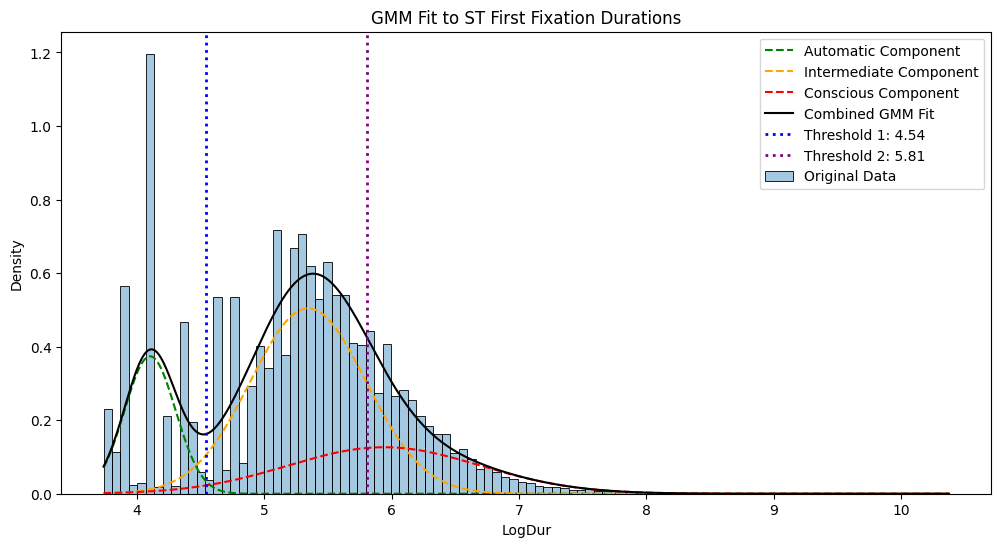

In [159]:
plt.figure(figsize=(12, 6))

# Plot the original data histogram
sns.histplot(data=FDst_first, x='LogDur', bins=100, stat='density', alpha=0.4, label='Original Data')

# Plot the fitted Gaussian components
x_axis = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
colors = ['green', 'orange', 'red']
labels = ['Automatic Component', 'Intermediate Component', 'Conscious Component']

for i, params in enumerate([auto_params_st, inter_params_st, cons_params_st]):
    # multiply the PDF by its weight to scale it correctly
    pdf = norm.pdf(x_axis, params['mean_st'], params['std_st']) * params['weight_st']
    plt.plot(x_axis, pdf, color=colors[i], linestyle='--', label=labels[i])

# Plot the combined GMM PDF
total_pdf_st = gmm_st.score_samples(x_axis)
plt.plot(x_axis, np.exp(total_pdf_st), color='black', label='Combined GMM Fit')

# Draw the threshold lines
plt.axvline(threshold_auto_inter_st, color='blue', linestyle=':', linewidth=2, label=f'Threshold 1: {threshold_auto_inter_st:.2f}')
plt.axvline(threshold_inter_cons_st, color='purple', linestyle=':', linewidth=2, label=f'Threshold 2: {threshold_inter_cons_st:.2f}')

plt.title('GMM Fit to ST First Fixation Durations')
plt.xlabel('LogDur')
plt.ylabel('Density')
plt.legend()
plt.show()

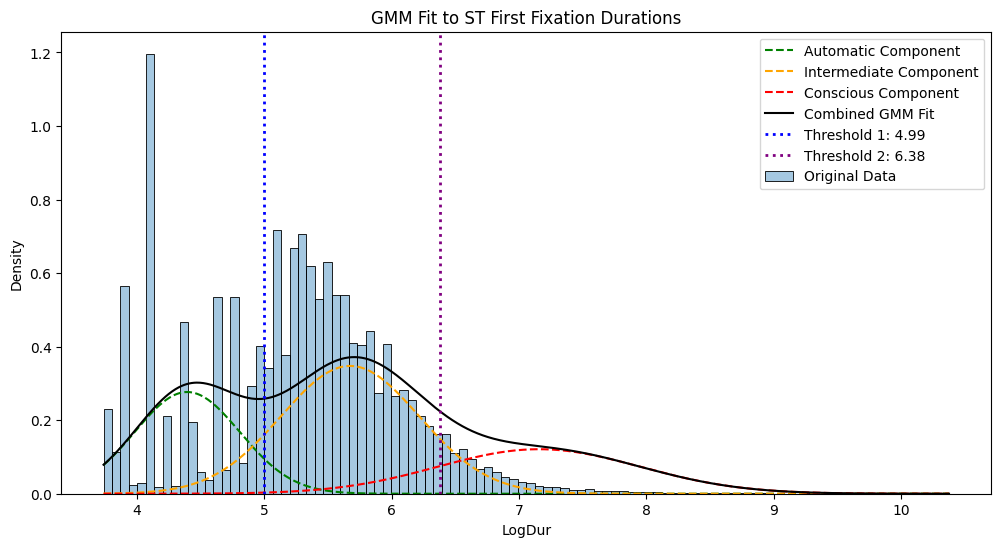

In [160]:
plt.figure(figsize=(12, 6))

# Plot the original data histogram
sns.histplot(data=FDst_first, x='LogDur', bins=100, stat='density', alpha=0.4, label='Original Data')

# Plot the fitted Gaussian components
x_axis = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
colors = ['green', 'orange', 'red']
labels = ['Automatic Component', 'Intermediate Component', 'Conscious Component']

for i, params in enumerate([auto_params_tt, inter_params_tt, cons_params_tt]):
    # multiply the PDF by its weight to scale it correctly
    pdf = norm.pdf(x_axis, params['mean_tt'], params['std_tt']) * params['weight_tt']
    plt.plot(x_axis, pdf, color=colors[i], linestyle='--', label=labels[i])

# Plot the combined GMM PDF
total_pdf_tt = gmm_tt.score_samples(x_axis)
plt.plot(x_axis, np.exp(total_pdf_tt), color='black', label='Combined GMM Fit')

# Draw the threshold lines
plt.axvline(threshold_auto_inter_tt, color='blue', linestyle=':', linewidth=2, label=f'Threshold 1: {threshold_auto_inter_tt:.2f}')
plt.axvline(threshold_inter_cons_tt, color='purple', linestyle=':', linewidth=2, label=f'Threshold 2: {threshold_inter_cons_tt:.2f}')

plt.title('GMM Fit to ST First Fixation Durations')
plt.xlabel('LogDur')
plt.ylabel('Density')
plt.legend()
plt.show()

##  Individual sessions - Finding Thresholds for Automatic and Conscious processing